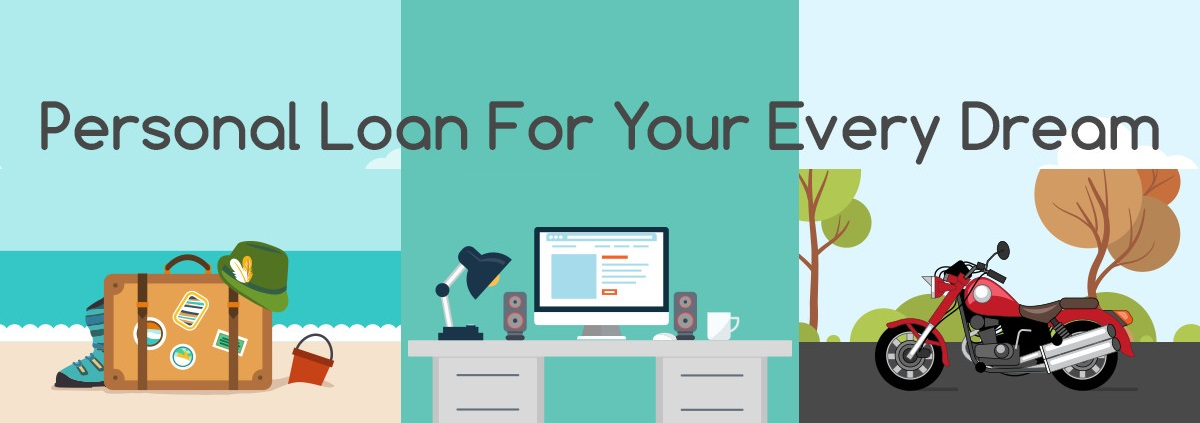

In [1]:
from IPython.display import HTML, display
display(HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>'''))

from IPython.display import Image
Image(filename="background.jpg")

#### Problem Statement and Definitions

##### What is Loan?

A loan is a sum of money borrowed from a lender with an agreement to pay it back, often with interest, over a specified period.

source: http://www.investopedia.com/

#### How the loan process works?

The loan process typically involves several steps. First, the borrower submits a loan application, providing information about their financial situation, the purpose of the loan, and any collateral. The lender then evaluates the application, assessing the borrower's creditworthiness, income, and the proposed collateral, if applicable. If approved, the terms of the loan, including the interest rate and repayment schedule, are determined. The borrower signs the loan agreement, and the funds are disbursed. Over the loan term, the borrower makes regular payments to repay the principal and interest. The specific process can vary depending on the type of loan, lender, and local regulations.

source: http://www.investopedia.com/

### Today, we're embarking on a journey to explore the realm of lending and loans!

Problem Statement:

What factors influence the approval or rejection of loan applications, and how can we use data-driven insights to enhance the decision-making process for lending institutions? We will not only explore the traditional aspects of loan approval but also delve into innovative approaches that can augment the accuracy and efficiency of lending decisions. Our aim is to go beyond mere data analysis; we aspire to provide actionable solutions to the challenges faced by lending institutions in determining loan eligibility.

Causes, Effects, and Scope of the Problem:

The causes of this problem primarily revolve around the complex interplay of various factors, such as credit scores, income, and employment status, which influence the approval process. The effects of this problem are significant, impacting both lending institutions and loan applicants. For institutions, the challenge lies in minimizing default rates while ensuring fair access to credit. For applicants, it's about securing financial assistance for their diverse needs. The scope of the problem extends to the entire lending industry and its role in fostering economic growth and financial stability. By addressing this problem, we aim to not only meet but exceed expectations by exploring innovative solutions and communicating our findings in an engaging and actionable manner.

In our analysis of the loan approval dataset created by Kai on Kaggle.com

Information about the columns:

- loan_id
- no_of_dependents: Number of Dependents of the Applicant
- education: Education of the Applicant (Graduate/Not Graduate)
- self_employed: Employment Status of the Applicant
- income_annum: Annual Income of the Applicant
- loan_amount: Loan Amount
- loan_term: Loan Term in Years
- cibil_score: Credit Score
- residential_assets_value
- commercial_assets_value
- luxury_assets_value
- bank_asset_value
- loan_status: Loan Approval Status (Approved/Rejected)

#### Data Gathering and Preparation

In [2]:
import pandas as pd
import numpy as np

In [3]:
# read in the loan dataset
loan = pd.read_csv('loan_approval_dataset.csv')

In [5]:
loan.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

Now that we have a preliminary understanding of the dataset, let's initiate our standard data cleaning procedures to ensure the data's quality and reliability.

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
loan.describe(include = "all")

loan_id   no_of_dependents  education  self_employed  \
count   4269.000000        4269.000000       4269           4269   
unique          NaN                NaN          2              2   
top             NaN                NaN   Graduate            Yes   
freq            NaN                NaN       2144           2150   
mean    2135.000000           2.498712        NaN            NaN   
std     1232.498479           1.695910        NaN            NaN   
min        1.000000           0.000000        NaN            NaN   
25%     1068.000000           1.000000        NaN            NaN   
50%     2135.000000           3.000000        NaN            NaN   
75%     3202.000000           4.000000        NaN            NaN   
max     4269.000000           5.000000        NaN            NaN   

         income_annum   loan_amount    loan_term   cibil_score  \
count    4.269000e+03  4.269000e+03  4269.000000   4269.000000   
unique            NaN           NaN          NaN           NaN   
top               NaN           NaN          NaN           NaN   
freq              NaN           NaN          NaN           NaN   
mean     5.059124e+06  1.513345e+07    10.900445    599.936051   
std      2.806840e+06  9.043363e+06     5.709187    172.430401   
min      2.000000e+05  3.000000e+05     2.000000    300.000000   
25%      2.700000e+06  7.700000e+06     6.000000    453.000000   
50%      5.100000e+06  1.450000e+07    10.000000    600.000000   
75%      7.500000e+06  2.150000e+07    16.000000    748.000000   
max      9.900000e+06  3.950000e+07    20.000000    900.000000   

         residential_assets_value   commercial_assets_value  \
count                4.269000e+03              4.269000e+03   
unique                        NaN                       NaN   
top                           NaN                       NaN   
freq                          NaN                       NaN   
mean                 7.472617e+06              4.973155e+06   
std                  6.503637e+06              4.388966e+06   
min                 -1.000000e+05              0.000000e+00   
25%                  2.200000e+06              1.300000e+06   
50%                  5.600000e+06              3.700000e+06   
75%                  1.130000e+07              7.600000e+06   
max                  2.910000e+07              1.940000e+07   

         luxury_assets_value   bank_asset_value  loan_status  
count           4.269000e+03       4.269000e+03         4269  
unique                   NaN                NaN            2  
top                      NaN                NaN     Approved  
freq                     NaN                NaN         2656  
mean            1.512631e+07       4.976692e+06          NaN  
std             9.103754e+06       3.250185e+06          NaN  
min             3.000000e+05       0.000000e+00          NaN  
25%             7.500000e+06       2.300000e+06          NaN  
50%             1.460000e+07       4.600000e+06          NaN  
75%             2.170000e+07       7.100000e+06          NaN  
max             3.920000e+07       1.470000e+07          NaN

In [8]:
loan[loan['loan_id'].duplicated(keep = False) == True].sort_values(['loan_id'])   

Empty DataFrame
Columns: [loan_id,  no_of_dependents,  education,  self_employed,  income_annum,  loan_amount,  loan_term,  cibil_score,  residential_assets_value,  commercial_assets_value,  luxury_assets_value,  bank_asset_value,  loan_status]
Index: []

Following the data cleaning checks, we have verified that:

- No null or duplicated values are present in the dataset.
- Categorical columns include 'no_of_dependents,' 'education,' 'self_employed,' and 'loan_status.'
- The dataset comprises 4,269 rows and 13 columns.
- About 62.2% of the dataset consists of 'approved' loan_status entries, indicating a slight imbalance in the dataset, which is considered acceptable without the need for rebalancing.
- The remaining columns are numerical.
- The dataset is exceptionally clean, requiring no additional data cleaning steps at this stage.


We initially deemed the dataset to be quite clean, with no immediate need for additional data cleaning steps. 

However, upon closer inspection, we've noticed a minor detail related to the column names. 🤔

In [9]:
loan.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


With the exception of 'loan_id,' all the column names have leading spaces that need to be removed to prevent potential confusion in the future.

In [10]:
loan.columns = loan.columns.str.replace(' ', '')

In [11]:
# Check it out again

loan.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

Now the columns' names are good.

In [12]:
loan.to_csv('loan_dataset_updated.csv', index=False)

In [72]:
# read again the updated loan dataset
loan_updated = pd.read_csv('loan_dataset_updated.csv')

#### Exploratory data analysis (EDA) & Modelling

Let's take a closer look at each individual feature in this dataset to gain a better understanding of its characteristics and significance!

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
loan_analysis = loan_updated.drop(['loan_id'], axis=1)

C:\Users\rahim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


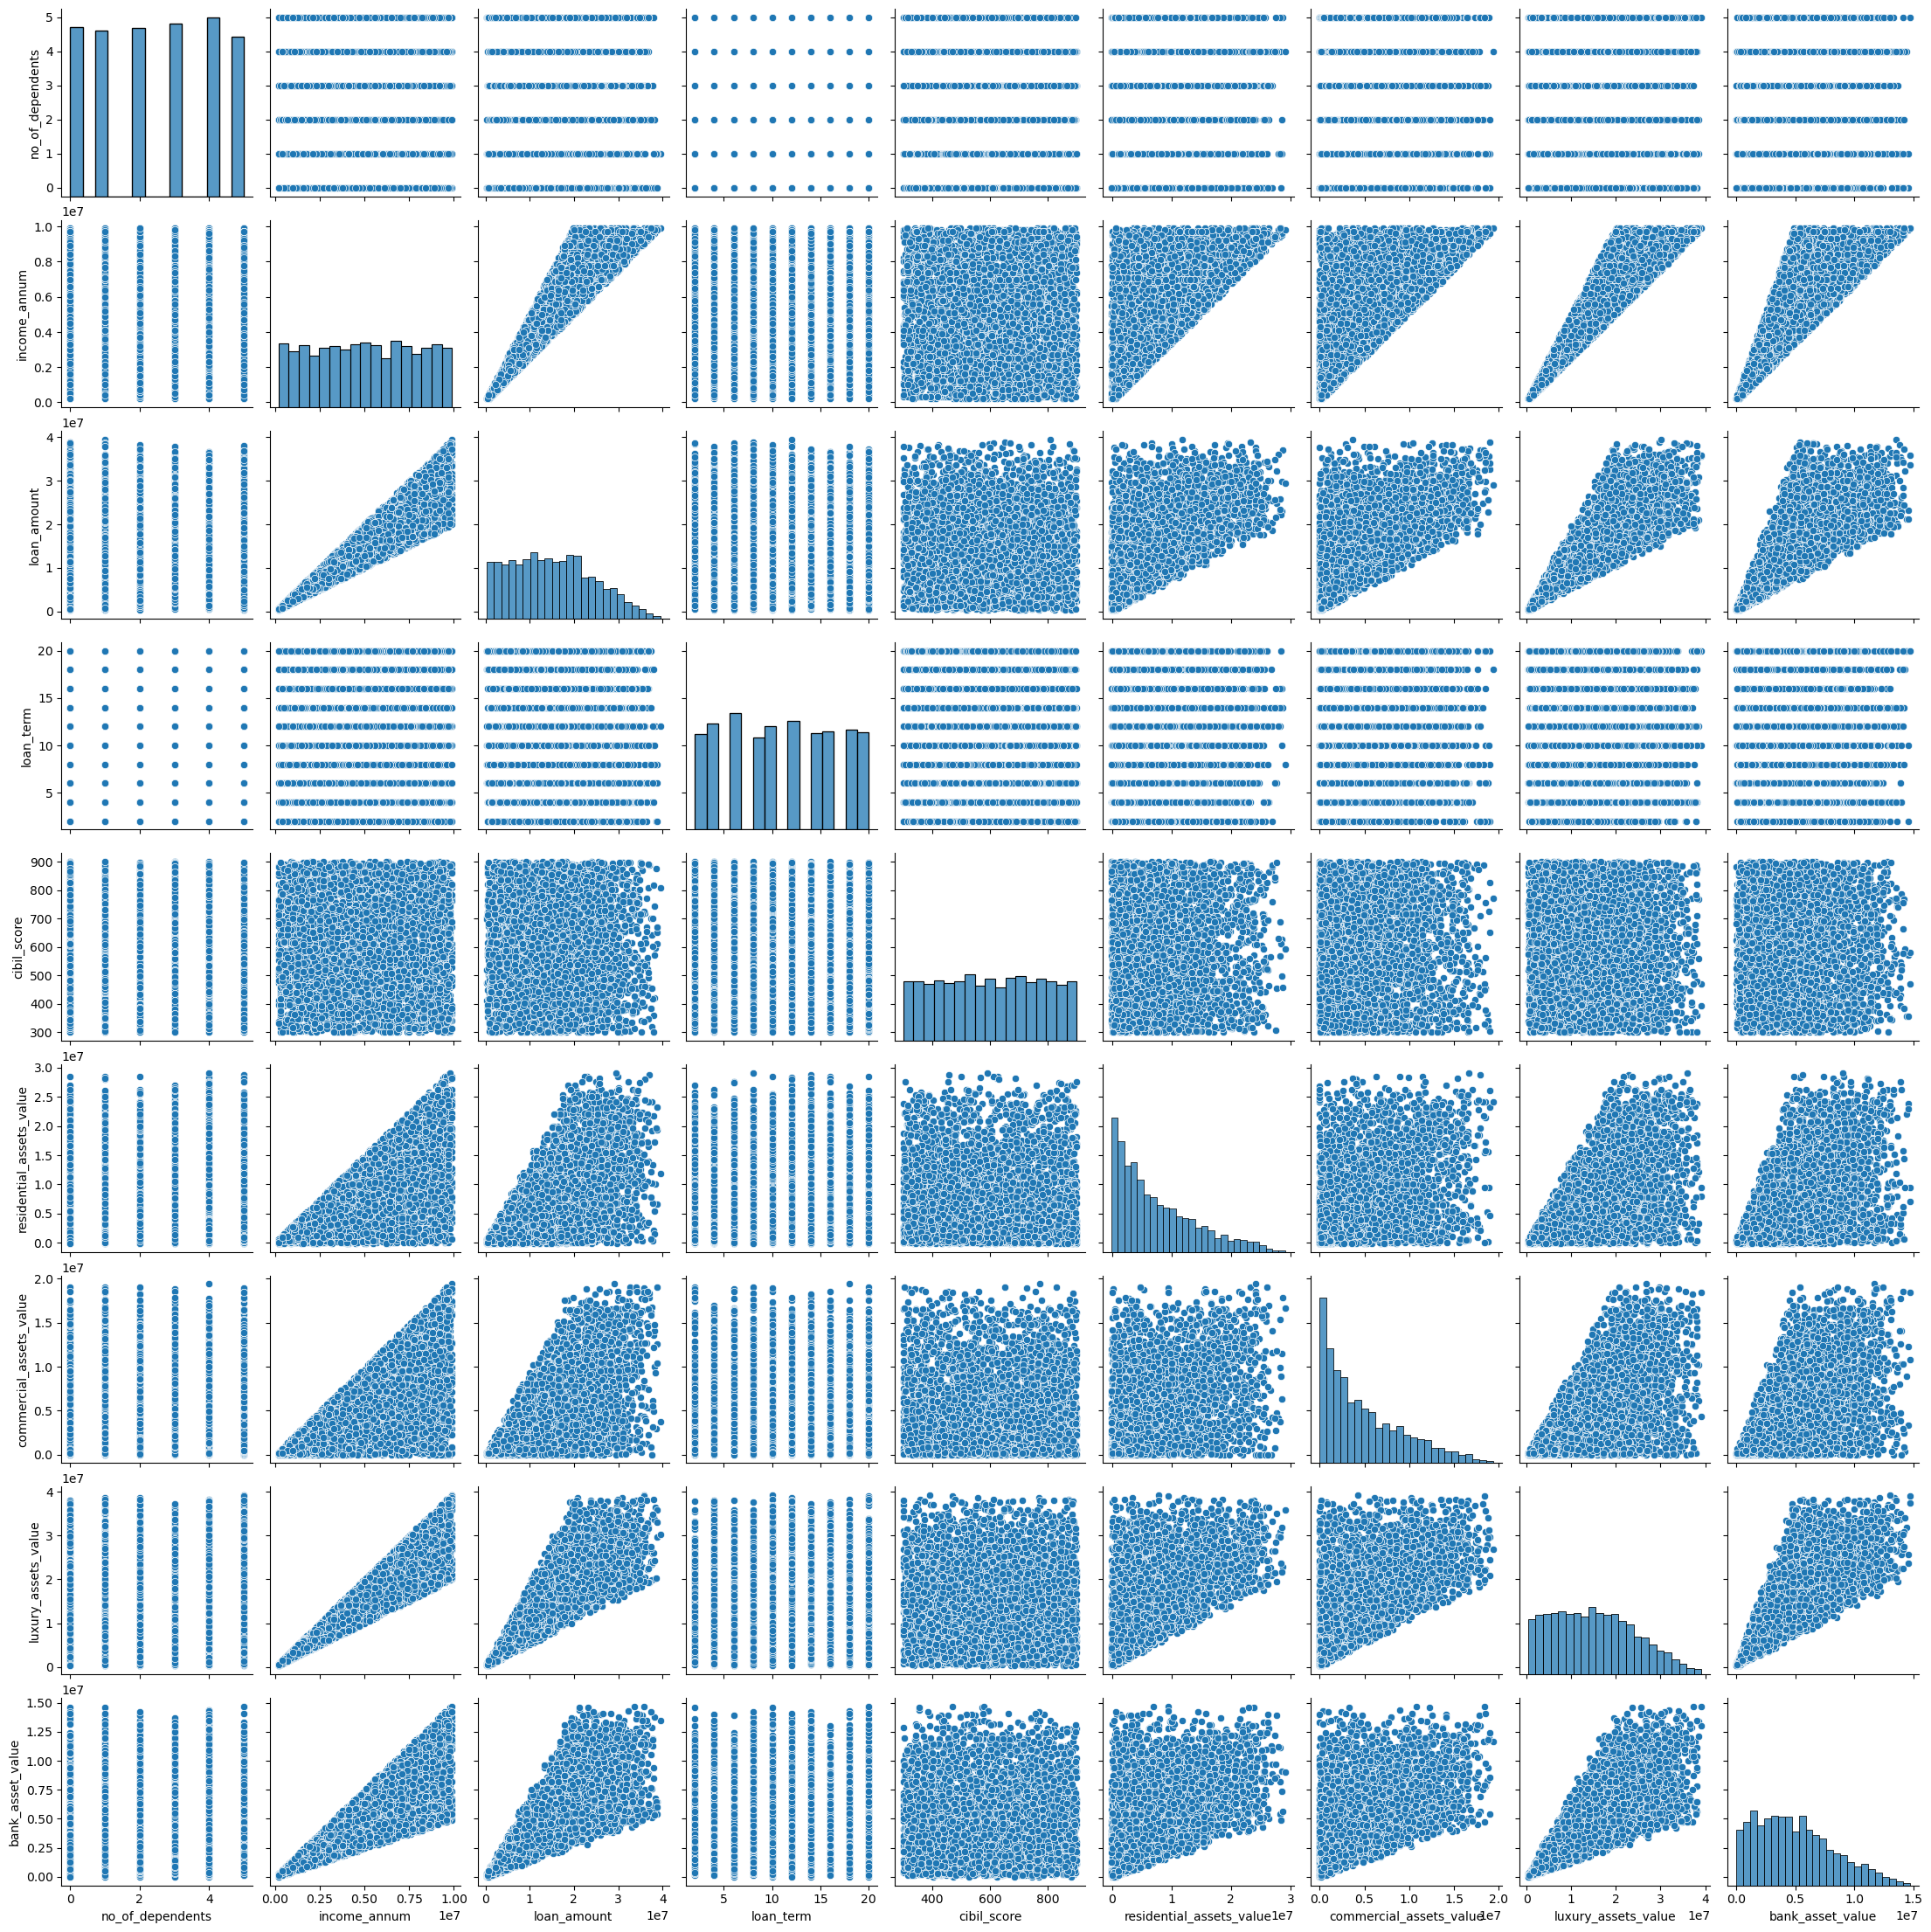

In [16]:
sns.pairplot(loan_analysis)

As evident from the data, certain variables exhibit a positive correlation with each other. For instance, there is a positive correlation between 'loan_amount' and 'income_annum,' 'luxury_assets_value' and 'bank_asset_value,' as well as 'income_annum' and 'luxury_assets_value.' We'll begin our analysis by exploring these relationships.

##### 1. Loan status and loan amount

First, let's begin by examining the loan amount distribution.

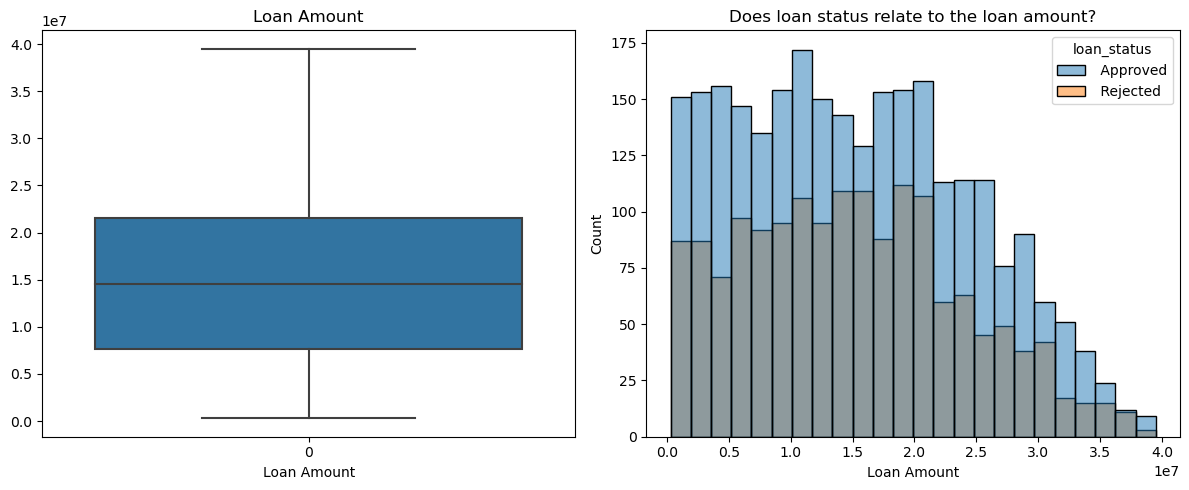

In [17]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the boxplot on the first subplot
sns.boxplot(loan['loan_amount'], ax=axes[0])
axes[0].set_title("Loan Amount")
axes[0].set_xlabel("Loan Amount")

# Plot the histogram with loan_status on the second subplot
sns.histplot(loan, x='loan_amount', hue='loan_status', ax=axes[1])
axes[1].set_title("Does loan status relate to the loan amount?")
axes[1].set_xlabel("Loan Amount")
axes[1].set_ylabel("Count")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

It's intriguing to note that both approved and rejected loans exhibit similar trends when it comes to different loan amounts. In the histogram, there doesn't seem to be a strong relationship between loan status and loan amount. However, we should now explore the impact of other features, such as annual income.

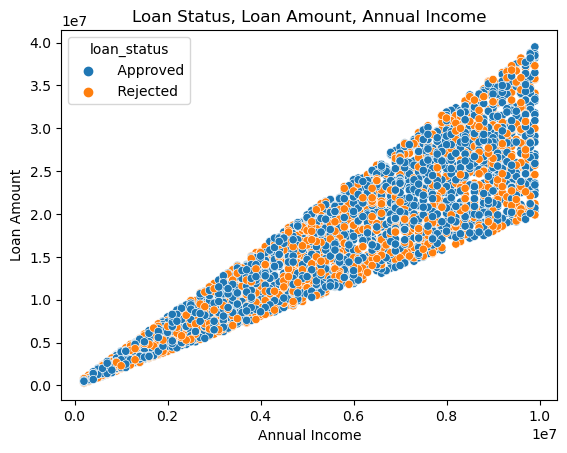

In [18]:
sns.scatterplot(x=loan['income_annum'], y= loan['loan_amount'], hue=loan['loan_status'])
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

The observations from the above figure are quite intriguing:

1. There appears to be a positive correlation between annual income and loan amount, with higher annual income associated with larger loan amounts. However, annual income does not exhibit a clear trend in relation to loan status.

2. Notably, among applicants with lower annual income, there is a limited range of loan amounts, while those with higher annual income show a broader range. This suggests that applicants with higher incomes might have more flexibility in choosing loan amounts, both in their favor and for the lenders' confidence in repayment.

3. In this dataset, the applicants with the highest annual income have been approved when applying for the highest loan amount (observed in the upper right corner of the figure). However, they also face the possibility of rejection when applying for lower loan amounts (seen in the middle right part of the figure or lower right of the triangle). This intriguing pattern may be attributed to different lenders' policies and other unique applicant conditions. To gain deeper insights, let's employ some code to further investigate these scenarios.

In [19]:
loan.loc[(loan['income_annum'] == loan['income_annum'].max()) & (loan['loan_status'] ==' Rejected')]

loan_id  no_of_dependents      education self_employed  income_annum  \
82         83                 2   Not Graduate           Yes       9900000   
157       158                 5   Not Graduate           Yes       9900000   
1179     1180                 5       Graduate            No       9900000   
1272     1273                 5   Not Graduate            No       9900000   
1409     1410                 3       Graduate           Yes       9900000   
1547     1548                 1       Graduate           Yes       9900000   
1890     1891                 5       Graduate            No       9900000   
2862     2863                 4       Graduate            No       9900000   
2869     2870                 4       Graduate            No       9900000   
3000     3001                 1   Not Graduate           Yes       9900000   
3548     3549                 2   Not Graduate            No       9900000   
4191     4192                 2       Graduate           Yes       9900000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
82       21200000         16          363                  25500000   
157      33300000          6          364                   5300000   
1179     35700000         10          392                   7900000   
1272     35800000         20          470                   9500000   
1409     29900000         20          490                  10500000   
1547     34100000         14          371                  24400000   
1890     24600000          2          530                  24200000   
2862     30000000         18          496                  10400000   
2869     26100000          2          481                  14500000   
3000     25700000          2          340                  15600000   
3548     19900000          6          312                  21400000   
4191     37300000          8          385                    600000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
82                   11400000             26600000           6800000   
157                  18700000             27800000           8300000   
1179                  4300000             39200000          13000000   
1272                 18400000             39100000          14700000   
1409                  9100000             27100000           7400000   
1547                  7100000             29300000           6200000   
1890                 12800000             20400000          13000000   
2862                  8000000             29300000          13800000   
2869                  5000000             23600000           9300000   
3000                 18800000             29500000          11800000   
3548                  2200000             31400000          11000000   
4191                   900000             27400000          14200000   

     loan_status  
82      Rejected  
157     Rejected  
1179    Rejected  
1272    Rejected  
1409    Rejected  
1547    Rejected  
1890    Rejected  
2862    Rejected  
2869    Rejected  
3000    Rejected  
3548    Rejected  
4191    Rejected

In the previous section, we observed that applicants with the highest annual income tend to apply for lower loan amounts but were nonetheless rejected by lenders. Upon closer examination of this subset, it's evident that the loan amount itself is not the primary reason for the rejections. Instead, we find that their credit scores, specifically their 'cibil_score,' fall within the "Poor" category, as defined by Equifax. Equifax classifies credit scores as follows: 300-579 as "Poor," 580-669 as "Fair," 670-739 as "Good," and 740-799 as "Very good."

[Source: Equifax](https://www.equifax.com/personal/education/credit/score/what-is-a-credit-score/#:~:text=300%2D579%3A%20Poor,740%2D799%3A%20Very%20good)

##### 2. Credit Score

Now, let's delve into the realm of credit scores!

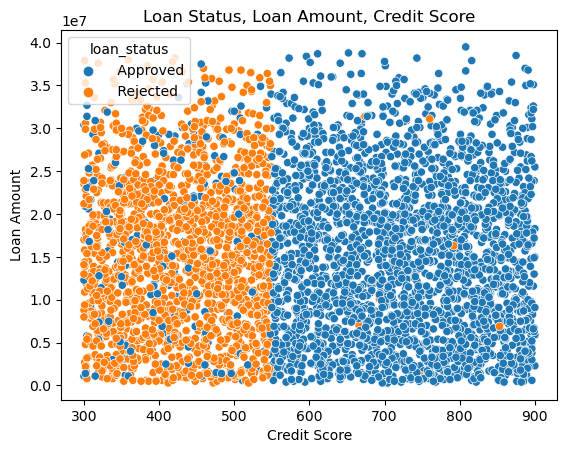

In [20]:
sns.scatterplot(x=loan['cibil_score'], y= loan['loan_amount'], hue=loan['loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

It's quite remarkable to observe how credit scores in the range of 540 to 550 distinctly separate loan statuses into two distinct categories. In essence, loan status appears to have a strong correlation with credit scores. Interestingly, the critical threshold that distinguishes loan status does not align with the highest score in the "poor" credit category (579). This implies that even individuals with "poor" credit scores above 540 to 550 still have a reasonable chance of being approved by loan lenders, potentially due to lender flexibility or other influencing factors.

However, a perplexing trend emerges when we scrutinize the data. Some applicants with high credit scores, notably above 740, were still met with rejection. A few of these applicants had applied for relatively small loan amounts below the median. The question that arises is: what factors are contributing to their rejection?

In [21]:
loan.loc[(loan['cibil_score'] > 740) & (loan['loan_status'] ==' Rejected')].sort_values(['cibil_score'], ascending= False)

loan_id  no_of_dependents      education self_employed  income_annum  \
559       560                 2       Graduate           Yes        200000   
3527     3528                 0       Graduate            No       1800000   
911       912                 0       Graduate           Yes       1300000   
3213     3214                 1   Not Graduate           Yes       4300000   
236       237                 3       Graduate           Yes        900000   
4099     4100                 3       Graduate            No       8700000   
1446     1447                 1       Graduate            No        300000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
559        500000          6          885                   -100000   
3527      6900000         10          853                    900000   
911       4800000          4          835                    500000   
3213     16300000         14          792                    400000   
236       3500000          4          770                    700000   
4099     31100000         16          760                    400000   
1446      1200000         18          747                    100000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
559                         0               300000            200000   
3527                   400000              3700000           1700000   
911                    100000              3300000            800000   
3213                   400000             10200000           4000000   
236                         0              2000000            600000   
4099                  1800000             19300000           4800000   
1446                        0               700000            200000   

     loan_status  
559     Rejected  
3527    Rejected  
911     Rejected  
3213    Rejected  
236     Rejected  
4099    Rejected  
1446    Rejected

Upon creating the subset, we've uncovered an interesting pattern where over five applicants with credit scores exceeding 740 experienced loan rejections. To delve deeper into the reasons behind this, our attention is drawn to four specific features: 'residential_assets_value,' 'commercial_assets_value,' 'luxury_assets_value,' and 'bank_asset_value.' Given that the dataset lacks descriptions for these variables, we'll conduct some research to gain a clearer understanding of what these features represent.

##### 3. residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value

Regarding the features 'residential_assets_value,' 'commercial_assets_value,' 'luxury_assets_value,' and 'bank_asset_value,' we've sought to clarify their meanings. While we couldn't find precise definitions on Google, Investopedia describes asset valuation as the process of determining the fair market value of an asset.

However, ChatGPT has offered some general interpretations based on the descriptions provided:

- 'Residential Assets Value': This likely represents the cumulative value of residential properties or real estate assets owned by the individuals or organizations in the dataset.

- 'Commercial Assets Value': This feature could signify the total value of commercial properties or business-related assets owned by the entities in the dataset. Commercial properties may include office buildings, retail spaces, warehouses, and similar assets.

- 'Luxury Assets Value': This might indicate the total value of high-end or luxury items possessed by the individuals or organizations, such as luxury vehicles, valuable artwork, jewelry, and other premium possessions.

- 'Bank Asset Value': This feature is potentially reflective of the total value of assets held by the bank or lending institution itself, encompassing cash reserves, investments, and other financial assets.

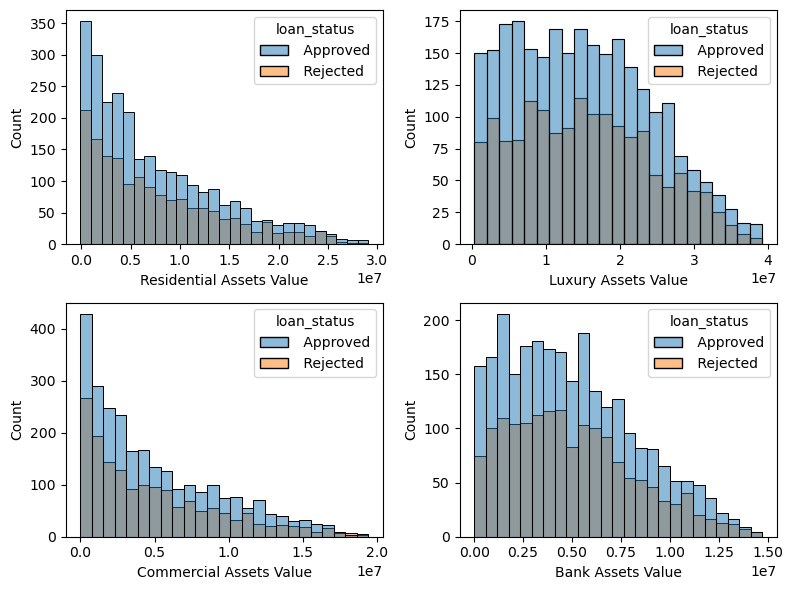

In [22]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.histplot(loan, x = 'residential_assets_value', hue = 'loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")
axes[0,0].set_ylabel("Count")

sns.histplot(loan, x = 'commercial_assets_value', hue = 'loan_status', ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")
axes[1,0].set_ylabel("Count")

sns.histplot(loan, x = 'luxury_assets_value', hue = 'loan_status', ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")
axes[0,1].set_ylabel("Count")

sns.histplot(loan, x = 'bank_asset_value', hue = 'loan_status', ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()

Similar to the loan amount, it's not immediately evident what the distinct trends are between these asset values and loan statuses. To gain deeper insights, we'll need to explore these asset values further and investigate their implications on loan status.

Let's create a subset and get to know the correlation scores between those 4 asset values and other variables.

In [23]:
# Select the relevant columns and exclude non-numeric columns
loan_asset = loan[['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score']]

# Calculate the correlation matrix
loan_asset_corr = loan_asset.corr()

<Axes: >

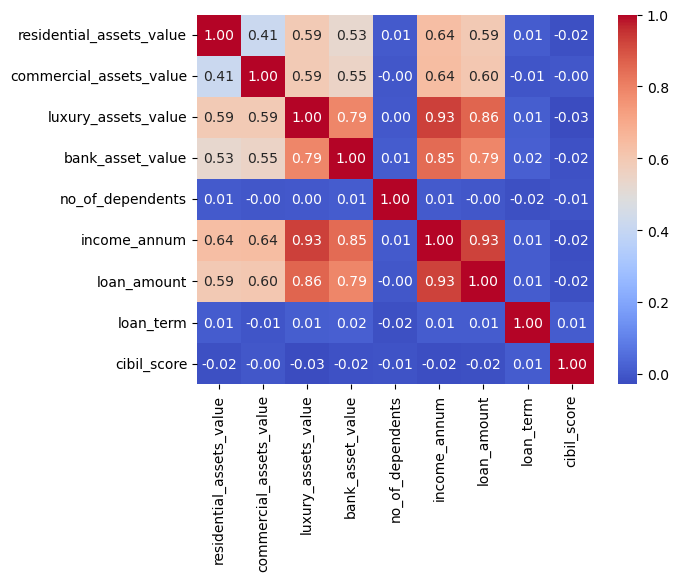

In [24]:
sns.heatmap(loan_asset_corr, annot=True, fmt=".2f", cmap="coolwarm")

Analyzing the correlation heatmap provides some intriguing insights:

1. Strong Positive Relationships: It's evident that all the asset values exhibit moderate to strong positive linear relationships with annual income. This suggests that individuals with higher annual incomes tend to have greater flexibility when it comes to acquiring assets, particularly in the case of luxury assets. 

2. Discrepancy in Correlation Strength: A question arises when comparing the correlation strengths of residential assets value and commercial assets value with annual income. These two categories exhibit slightly weaker positive correlations when compared to other asset values. To elucidate this observation, ChatGPT offers a valuable perspective:

   - Nature of Assets: Luxury assets and bank assets might have a more direct connection to an individual's income. Higher-income individuals are more likely to possess luxury items and maintain significant bank assets. Conversely, residential and commercial assets could be influenced by additional factors like location, real estate market trends, and investment strategies, potentially leading to a slightly weaker correlation with income.

   - Economic Factors: Income levels significantly impact one's ability to afford luxury items and accumulate substantial bank assets, reinforcing the stronger correlation. In contrast, residential and commercial assets may be subject to broader economic trends and market conditions, contributing to a less direct correlation with individual income.

   - Diverse Income Sources: Variability in income sources, beyond primary employment, can also influence the relationship between assets and annual income.

   - Data Complexity: Inherent variability in the data can lead to variations in correlation strength. Smaller datasets might yield less precise estimates of correlation.

   - Outliers and Extreme Values: The presence of outliers or extreme values can wield significant influence on correlation values. If a few individuals with exceptionally high incomes also possess high asset values, it could bolster the observed correlation.

The presence of asset values equal to 0 could be attributed to the possibility that these asset values correspond to distinct categories of properties or assets. To elaborate, it's conceivable that the "residential asset" category pertains to a particular property type that, in some cases, may have a value of 0. Conversely, the "commercial asset" category might represent a different type of property, such as a commercial building, which can have varying values. This differentiation in property types may explain the variability in asset values, including cases where they are recorded as 0.

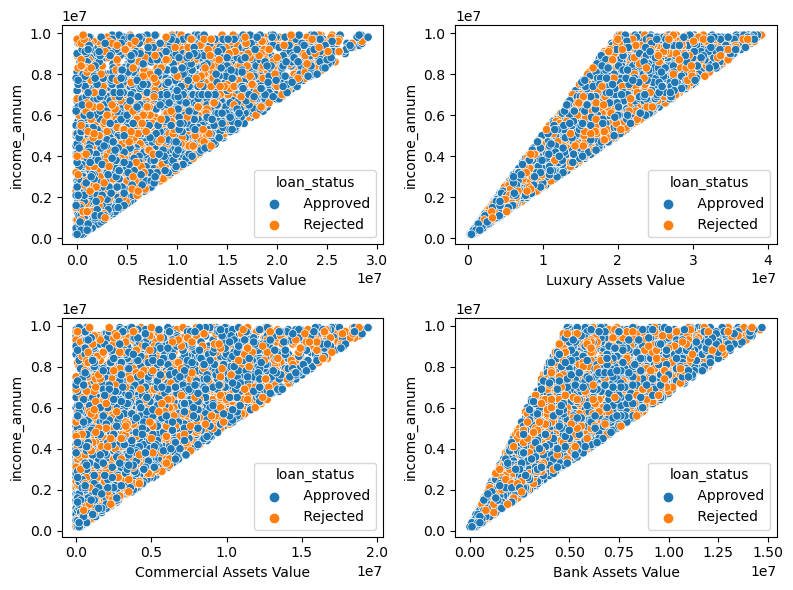

In [25]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.scatterplot(loan, x = 'residential_assets_value', y= 'income_annum', hue = 'loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")

sns.scatterplot(loan, x = 'commercial_assets_value', y= 'income_annum', hue = 'loan_status',ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")

sns.scatterplot(loan, x = 'luxury_assets_value', y= 'income_annum', hue = 'loan_status',ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")

sns.scatterplot(loan, x = 'bank_asset_value', y= 'income_annum', hue = 'loan_status',ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")

plt.tight_layout()
plt.show()

Let's delve deeper into the asset values by examining scatterplots. Notably, both residential_assets_value and commercial_assets_value plots exhibit distinct right triangles, effectively dividing the plots into two distinct sections. This intriguing pattern suggests that the relationship between annual income and these asset values might exhibit a threshold effect. In practical terms, it implies that once the asset value surpasses a certain threshold, annual income tends to see a significant increase.

Conversely, for luxury_assets_value and bank_asset_value, we observe obtuse triangles, and there's an intriguing difference between the two. The smaller triangle associated with luxury assets value, compared to bank asset value, hints at a strong correlation between luxury assets and annual income. However, there's higher variability in annual income for a given luxury assets value, suggesting that while luxury assets can be indicative of higher annual income, there are exceptions to this relationship.

##### 4. Loan Term

While the correlation heatmap indicates a lack of strong to moderate linear relationships between loan_term and other variables, there's always room for further exploration, making this phase one of the most exciting aspects of a data analysis project.

In [26]:
cross_loan_term = pd.crosstab(index=loan['loan_term'], columns=loan['loan_status'])
cross_loan_term['Total'] = cross_loan_term[' Approved'] + cross_loan_term[' Rejected'] 
cross_loan_term['Approved_percentage'] = (cross_loan_term[' Approved']/cross_loan_term['Total'])*100
cross_loan_term['Rejected_percentage'] = (cross_loan_term[' Rejected']/cross_loan_term['Total'])*100
cross_loan_term

loan_status   Approved   Rejected  Total  Approved_percentage  \
loan_term                                                       
2                  315         89    404            77.970297   
4                  366         81    447            81.879195   
6                  282        208    490            57.551020   
8                  220        166    386            56.994819   
10                 229        207    436            52.522936   
12                 276        180    456            60.526316   
14                 239        166    405            59.012346   
16                 236        176    412            57.281553   
18                 257        165    422            60.900474   
20                 236        175    411            57.420925   

loan_status  Rejected_percentage  
loan_term                         
2                      22.029703  
4                      18.120805  
6                      42.448980  
8                      43.005181  
10                     47.477064  
12                     39.473684  
14                     40.987654  
16                     42.718447  
18                     39.099526  
20                     42.579075

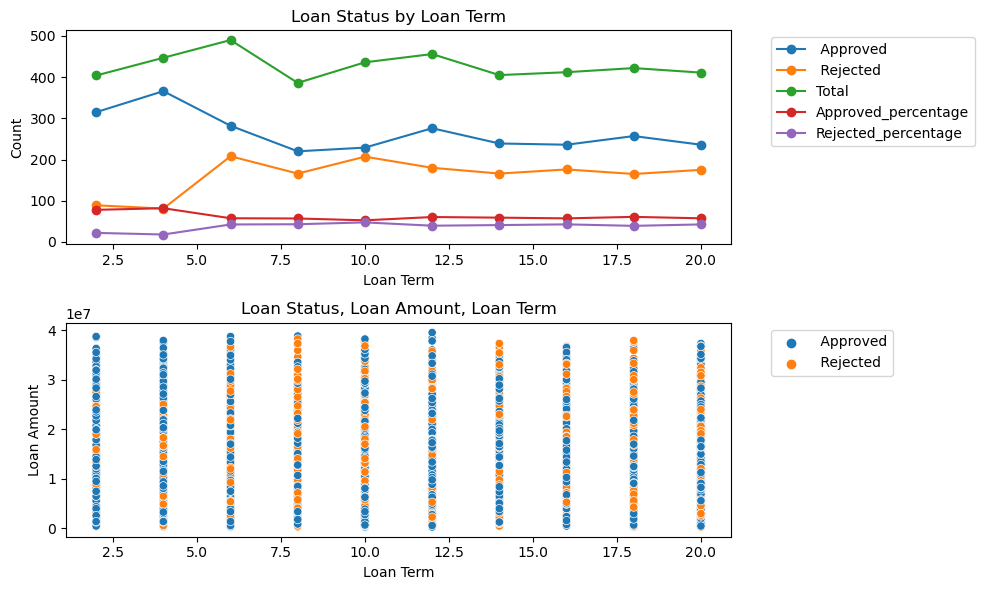

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# Plot 1 - Line chart
cross_loan_term.plot(kind='line', marker='o', ax=axes[0])
axes[0].set_title('Loan Status by Loan Term')
axes[0].set_xlabel('Loan Term')
axes[0].set_ylabel('Count')
axes[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Plot 2 - Scatterplot
sns.scatterplot(loan, x='loan_term', y='loan_amount', hue='loan_status', ax=axes[1])
axes[1].set_title("Loan Status, Loan Amount, Loan Term")
axes[1].set_xlabel("Loan Term")
axes[1].set_ylabel("Loan Amount")
axes[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.tight_layout()
plt.show()

We commend the dataset owner for providing well-balanced observations across different loan terms, simplifying our data analysis. Notably, the shortest loan term, 2 years, enjoys a high approval rate, rivaled only by the 4-year term, which boasts the most favorable approval odds.

However, for loan terms exceeding 4 years, the probability of rejection significantly escalates, inversely affecting approval chances. This trend persists until the 8-year term, where both approval and rejection probabilities normalize. Beyond the 10-year term, the trend maintains, with a slightly higher approval rate than rejection.

Interestingly, within the 2-year loan term group, applicants seeking loans over 30,000,000 receive unanimous approval. A similar pattern emerges in the 4-year term group for loan amounts above 30,000,000. In contrast, smaller loan amounts face a greater risk of rejection, particularly within the 4-year term category. Typically, one might expect that shorter-term loans with lower amounts would be easier to repay compared to larger sums. To understand why some applications in this category face rejection, we'll delve deeper using a subset analysis.

In [28]:
loan.loc[(loan['loan_term'] <=4) & (loan['loan_status'] ==' Rejected')].sort_values(['loan_amount']).head(10)

loan_id  no_of_dependents      education self_employed  income_annum  \
1388     1389                 4       Graduate           Yes        300000   
1061     1062                 3   Not Graduate            No        300000   
3393     3394                 5   Not Graduate            No        300000   
1199     1200                 2   Not Graduate            No        300000   
949       950                 2       Graduate           Yes        300000   
853       854                 3   Not Graduate            No        300000   
519       520                 2       Graduate           Yes        500000   
2643     2644                 4       Graduate            No        600000   
1012     1013                 5       Graduate           Yes        500000   
3475     3476                 5   Not Graduate            No        700000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
1388       500000          2          353                    600000   
1061       500000          2          477                    700000   
3393       600000          4          418                    500000   
1199       600000          2          383                    600000   
949        700000          4          411                    600000   
853        800000          2          458                    500000   
519       1300000          4          427                   1400000   
2643      1400000          4          507                    200000   
1012      1400000          4          471                    500000   
3475      1400000          4          344                   1500000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
1388                   100000              1200000            400000   
1061                   200000               800000            400000   
3393                   200000               700000            200000   
1199                   300000              1100000            400000   
949                         0              1200000            100000   
853                         0              1100000            200000   
519                    500000              1800000            600000   
2643                   300000              1700000            400000   
1012                   100000              1300000            300000   
3475                   800000              2600000            300000   

     loan_status  
1388    Rejected  
1061    Rejected  
3393    Rejected  
1199    Rejected  
949     Rejected  
853     Rejected  
519     Rejected  
2643    Rejected  
1012    Rejected  
3475    Rejected

Among the predominant factors leading to rejection, low credit scores loom as a critical contributor. Annual income assumes significance, given that the majority of applicants in this subset exhibit incomes below the median threshold of $5,100,000. Additionally, the number of dependents emerges as a potential driver of rejection, particularly within this subset where all applicants have more than two dependents. This effect becomes more pronounced when coupled with lower annual income.

##### 5. Number of dependents

First, let's begin by examining the distribution of this variable.

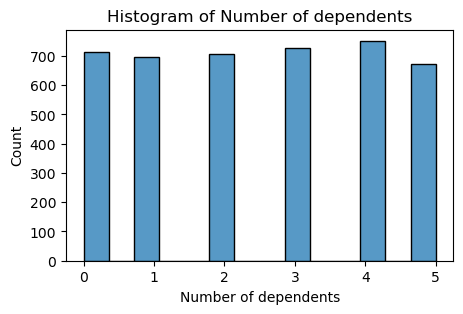

In [29]:
plt.figure(figsize = (5,3))
sns.histplot(loan['no_of_dependents'])
plt.xlabel("Number of dependents")
plt.title("Histogram of Number of dependents")

plt.show()

Surprisingly, the "Number of Dependents" variable can be effectively discretized, which will greatly aid our analysis. Now, let's explore whether the number of dependents has any correlation with the loan status by utilizing the crosstab function.

In [30]:
cross_dependents = pd.crosstab(index=loan['no_of_dependents'], columns=loan['loan_status'])
cross_dependents['Approved_percentage'] = (cross_dependents[' Approved']/(cross_dependents[' Approved'] + cross_dependents[' Rejected'])) * 100
cross_dependents['Rejected_percentage'] = (cross_dependents[' Rejected']/(cross_dependents[' Approved'] + cross_dependents[' Rejected'])) * 100
cross_dependents

loan_status        Approved   Rejected  Approved_percentage  \
no_of_dependents                                              
0                       457        255            64.185393   
1                       430        267            61.692970   
2                       441        267            62.288136   
3                       457        270            62.861073   
4                       465        287            61.835106   
5                       406        267            60.326895   

loan_status       Rejected_percentage  
no_of_dependents                       
0                           35.814607  
1                           38.307030  
2                           37.711864  
3                           37.138927  
4                           38.164894  
5                           39.673105

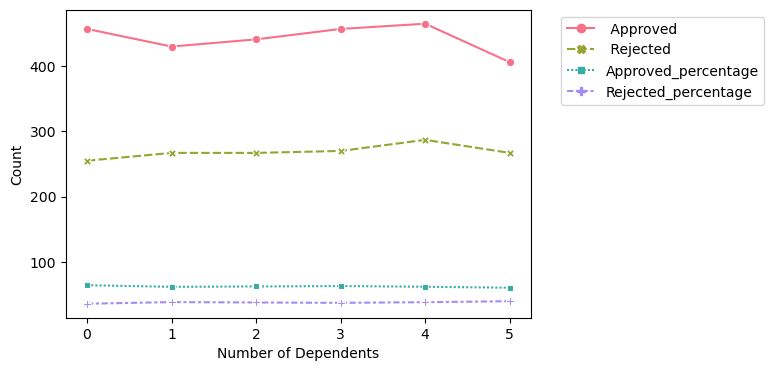

In [31]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=cross_dependents, markers=True, palette="husl")
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()

Upon analyzing the line chart illustrating the percentage of applicants approved or rejected based on the number of dependents, it becomes evident that two percentage lines follow a remarkably even pattern. Although a slight fluctuation is visible in the "approved" line, it could be attributed to variations in the total number of applicants. Therefore, I must revise my initial assumption and conclude that there is no discernible trend between the number of dependents and loan status.

##### 6. Self Employed

In [32]:
self_employed = loan.groupby(["self_employed"], as_index=False).agg(
    count=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"), 
    average_credit_score=("cibil_score", "mean"),
    average_loan_term=("loan_term", "mean"),
    avg_residential_value=('residential_assets_value', "mean"),
    avg_commercial_value=('commercial_assets_value', "mean"),
    avg_luxury_value=('luxury_assets_value', "mean"),
    avg_bank_value=('bank_asset_value', "mean")
).round(2).reset_index(drop=True)

In [33]:
self_employed

self_employed  count  median_annual_income  average_loan_amount  \
0            No   2119             5100000.0          15120245.40   
1           Yes   2150             5100000.0          15146465.12   

   average_credit_score  average_loan_term  avg_residential_value  \
0                600.78              10.88             7432373.76   
1                599.10              10.92             7512279.07   

   avg_commercial_value  avg_luxury_value  avg_bank_value  
0            5052713.54       15085842.38       4977395.0  
1            4894744.19       15166186.05       4976000.0

Similarly to the findings with self-employment, there appear to be no substantial distinctions between variables such as the number of dependents, education, and other factors in this dataset. 

##### 7. Education

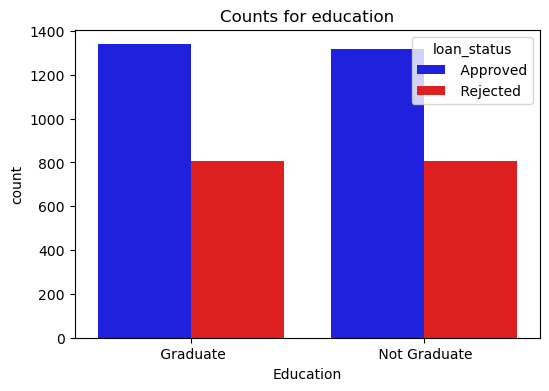

In [36]:
plt.figure(figsize = (6,4))
sns.countplot(loan, x='education', hue='loan_status', palette={" Approved": 'b', " Rejected": 'r'})
plt.xlabel("Education")
plt.title("Counts for education")

plt.show()

The distribution of applicants based on their education status appears to be fairly balanced. However, there is some ambiguity in the dataset description regarding what "education" exactly represents, whether it signifies high-school education or college education remains uncertain. This ambiguity prompts us to investigate whether an applicant's education level has any discernible impact on the other variables in the dataset.

In [37]:
education = loan.groupby(["education"], as_index=False).agg(
    count_by_education=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"), 
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")
    
).round(2).reset_index(drop=True)

education

education  count_by_education  median_annual_income  \
0       Graduate                2144             5100000.0   
1   Not Graduate                2125             5000000.0   

   average_loan_amount  average_credit_score  average_loan_term  \
0          15229151.12                599.14              10.85   
1          15036894.12                600.74              10.95   

   avg_residential_value  avg_commerical_value  avg_luxury_value  \
0             7543376.87            4943610.07       15239319.03   
1             7401223.53            5002964.71       15012282.35   

   avg_bank_value  
0      5007182.84  
1      4945929.41

By creating a sub-table, we can say there are no significant differences between the education and other variables in this dataset. Despite not identifying a strong correlation between these variables and other dataset elements, we remain eager to explore further using various analytical approaches.

### Machine Learning Model

We are now moving forward to the construction stage, where we will build a machine learning model. However, before we begin, there are some additional steps we need to take to prepare the variables for the subsequent stages.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [38]:
loan_dummies = pd.get_dummies(loan_updated)


In [39]:
loan_dummies.rename(columns = {'education_ Graduate':'education', 'self_employed_ Yes':'self_employed', 'loan_status_ Approved':'loan_status' }, inplace = True)

In [40]:
loan_dummies = loan_dummies.drop(['education_ Not Graduate', 'self_employed_ No', 'loan_status_ Rejected'], axis=1)

In [41]:
loan_dummies.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education', 'self_employed', 'loan_status'],
      dtype='object')

Now, let's reassess the correlation scores!

In [42]:
loan_corr = loan_dummies.corr()

<Axes: >

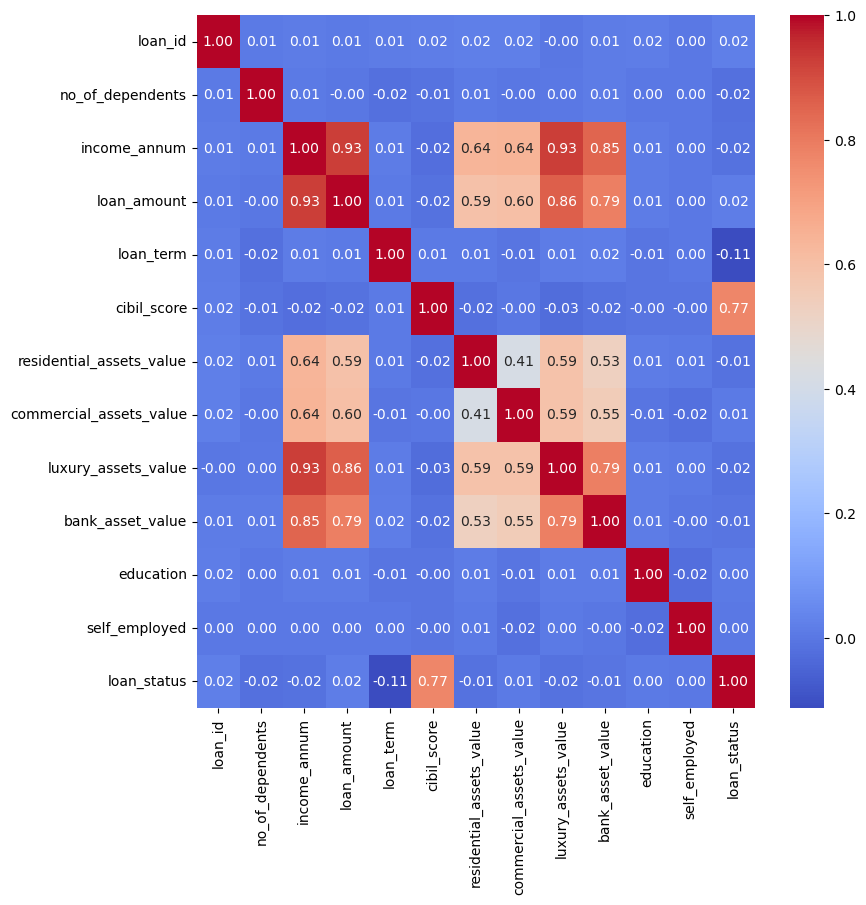

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(loan_corr, annot=True, fmt=".2f", cmap="coolwarm")

1. The most influential variable affecting loan_status is cibil_score.

2. There's no observable linear relationship between education and self_employed with other variables.

3. Strong linear relationships exist between:
   - income_annum and loan_amount
   - luxury_assets_value and income_annum
   - bank_asset_value and income_annum
   - luxury_assets_value and bank_asset_value

In [48]:
y = loan_dummies['loan_status']
X = loan_dummies.drop(['loan_status'], axis =1)

In [49]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 42)

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [51]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2561, 12), (2561,), (854, 12), (854,), (854, 12), (854,))


We have effectively divided the dataset into three distinct sets for training, validation, and testing, maintaining a balanced 60:20:20 ratio.

In [52]:
stand_scaler = StandardScaler()
stand_scaler.fit(X_train)
X_train_stand = stand_scaler.transform(X_train)
X_val_stand = stand_scaler.transform(X_val)
X_test_stand = stand_scaler.transform(X_test)

Our initial approach is to begin with a simple logistic regression model.

In [53]:
clf = LogisticRegression().fit(X_train_stand,y_train)

In [54]:
coefficients = clf.coef_[0]
intercept = clf.intercept_

variables = list(X_train.columns)

clf_summary = []
for var, coef in zip(variables, coefficients):
    clf_summary.append([var, coef])

clf_summary.append(["Intercept", intercept[0]])


print(tabulate(clf_summary, headers=["Variables", "Coefficient"], tablefmt="grid"))

+--------------------------+---------------+
| Variables                |   Coefficient |
+==========================+===============+
| loan_id                  |    0.0834055  |
+--------------------------+---------------+
| no_of_dependents         |   -0.0799878  |
+--------------------------+---------------+
| income_annum             |   -1.66955    |
+--------------------------+---------------+
| loan_amount              |    1.14679    |
+--------------------------+---------------+
| loan_term                |   -0.867336   |
+--------------------------+---------------+
| cibil_score              |    4.12611    |
+--------------------------+---------------+
| residential_assets_value |    0.0633737  |
+--------------------------+---------------+
| commercial_assets_value  |    0.0407583  |
+--------------------------+---------------+
| luxury_assets_value      |    0.341138   |
+--------------------------+---------------+
| bank_asset_value         |    0.18586    |
+---------

The logistic regression model was trained using standardized features from the training data. In this model, the coefficients signify how a one-unit increase in each standardized feature affects the log-odds of the target variable. The intercept term establishes the baseline log-odds when all standardized features are zero. Positive coefficients indicate a positive relationship with the target variable, while negative coefficients suggest a negative relationship. The magnitude of the coefficients indicates the strength of the association between each feature and the log-odds of the outcome.

In [55]:
y_lr = clf.predict(X_val_stand) 

In [56]:
print('Accuracy:', '%.3f' % accuracy_score(y_val, y_lr))
print('Precision:', '%.3f' % precision_score(y_val, y_lr))
print('Recall:', '%.3f' % recall_score(y_val, y_lr))
print('F1 Score:', '%.3f' % f1_score(y_val, y_lr))

Accuracy: 0.920
Precision: 0.935
Recall: 0.931
F1 Score: 0.933


Although the Logistic Regression model has shown good performance, we also intend to explore the Random Forest model.

In [57]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_forest = random_search.best_estimator_

In [58]:
best_params, best_forest

({'n_estimators': 150,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_depth': None},
 RandomForestClassifier(min_samples_split=5, n_estimators=150))

In [59]:
rf_opt = RandomForestClassifier(n_estimators = 150, max_depth = None, 
                                min_samples_leaf = 1, min_samples_split = 5,random_state = 0)
rf_opt.fit(X_train, y_train)
y_rf = rf_opt.predict(X_val)

In [60]:
print('Accuracy:', '%.3f' % accuracy_score(y_val, y_rf))
print('Precision:', '%.3f' % precision_score(y_val, y_rf))
print('Recall:', '%.3f' % recall_score(y_val, y_rf))
print('F1 Score:', '%.3f' % f1_score(y_val, y_rf))

Accuracy: 0.972
Precision: 0.975
Recall: 0.978
F1 Score: 0.976


In [61]:
y_test_rf = rf_opt.predict(X_test)

print('Accuracy:', '%.3f' % accuracy_score(y_test, y_test_rf))
print('Precision:', '%.3f' % precision_score(y_test, y_test_rf))
print('Recall:', '%.3f' % recall_score(y_test, y_test_rf))
print('F1 Score:', '%.3f' % f1_score(y_test, y_test_rf))

Accuracy: 0.973
Precision: 0.979
Recall: 0.978
F1 Score: 0.979


Given that the Random Forest model outperformed the Logistic Regression model, we have decided to proceed with the Random Forest model.

The similarity in scores between the validation and test sets is a positive sign, indicating that the model's performance generalizes effectively to new and unseen data. Here's a breakdown of the scores:

- Accuracy: The accuracy on both the validation and test sets is approximately 97.2% to 97.3%. This implies that the model correctly classifies about 97.2% to 97.3% of instances in both datasets.

- Precision: Precision, measuring the proportion of correctly predicted positive instances, stands at around 97.8% in both sets. This indicates that roughly 97.8% of instances predicted as positive by the model are indeed positive.

- Recall: The recall, representing how many actual positive instances the model captures, is around 97.9% in both sets. This means the model correctly identifies about 97.9% of actual positive instances.

- F1 Score: The F1 score, a balance between precision and recall, is around 97.9% in both sets, demonstrating a balanced trade-off between these two metrics.

The consistent performance of these metrics between the validation and test sets is reassuring, suggesting the model doesn't overfit the validation set and is likely to perform well on new, unseen data. Overall, the Random Forest model demonstrates solid and robust predictive capabilities across different datasets.

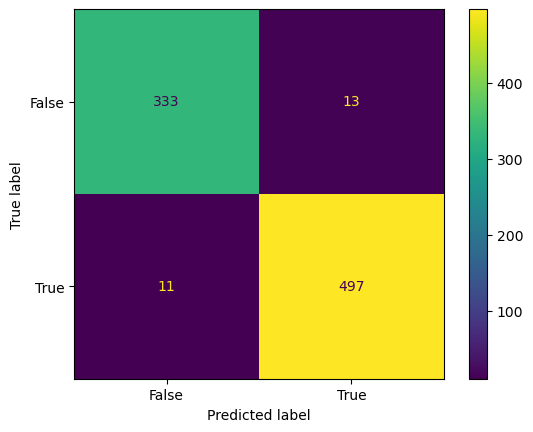

In [62]:
cm = metrics.confusion_matrix(y_val, y_rf, labels = rf_opt.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_opt.classes_)
disp.plot()

The scores in the confusion matrix above mean:

-True negatives (upper left): The number of applications that were rejected that the model accurately predicted were rejected.

-False negatives (bottom left): The number of applications that were approved that the model inaccurately predicted were rejected.

-False positives (upper right): The number of applications that were rejected that the model inaccurately predicted were approved.

-True positives (bottom right): The number of applications that were approved that the model accurately predicted were approved.

<Axes: >

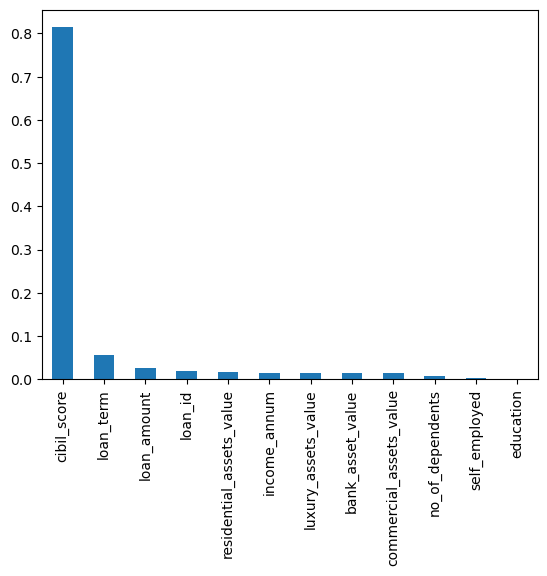

In [63]:
importances = rf_opt.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

# Sort the Series by importance in descending order
forest_importances_sorted = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances_sorted.plot.bar(ax=ax)

Our analysis has highlighted cibil_score as the most influential factor affecting our model's predictions. This prominence may be attributed to the strong relationship between cibil_score and the target variable, loan_status. However, it's vital to emphasize that correlation doesn't establish causation. While cibil_score plays a pivotal role in our model's predictions, we must recognize that our model uncovers patterns and associations in the data. The significance of a feature doesn't necessarily imply a direct causal relationship with the predicted outcomes.

In our specific context, cibil_score corresponds to credit scores. We should also acknowledge that other factors, potential interactions between features, and even data noise can contribute to these observations. Therefore, comprehending our model's behavior fully requires considering these factors. The insights gained from the feature importance analysis serve as valuable guidance for making informed decisions and refining our strategies. It's essential to interpret these findings in conjunction with domain knowledge and additional analyses.

### Evaluation & Recommendations

In conclusion, this data analysis project was initiated to unravel the intricate relationships between various variables within a dataset and their impact on loan approval status. Through an extensive exploratory data analysis (EDA), we scrutinized key features, including loan amount, annual income, loan term, asset values, and demographic factors.

Our analysis uncovered several pivotal insights:

**1. Loan Amount and Annual Income:** We identified a robust positive correlation between loan amount and annual income. This correlation reaffirmed that individuals with higher annual incomes tend to secure larger loan amounts, underscoring the pivotal role of a borrower's financial capacity in loan approval decisions.

**2. Loan Term and Approval Rate:** Notably, shorter loan terms, especially those of 2 and 4 years, exhibited higher approval rates compared to longer terms. This implies that borrowers choosing shorter durations are perceived as lower risk by lenders.

**3. Asset Values and Income:** Luxury asset values and bank asset values displayed more substantial positive correlations with annual income when contrasted with residential and commercial asset values. This indicates that higher-income individuals are more likely to possess luxury items and maintain larger bank assets.

**4. Machine Learning Model:** We harnessed the power of the Random Forest model, which excels at handling non-linearity, interactions between variables, and potential outliers. This model consistently predicted loan applications with an accuracy ranging from 97% to 98%. The Random Forest model not only identified the most influential features for predicting loan approvals but also ensured reliable predictive performance across diverse scenarios.

In light of these findings, it's evident that loan approval decisions are influenced by a blend of financial factors, encompassing income, loan amount, and loan term. Although certain categorical variables showed limited impact on loan amount, the primary focus remains on financial indicators.

It's imperative to acknowledge the limitations of our analysis. The dataset may not encompass all relevant factors affecting loan approval, and outliers or data inaccuracies could introduce biases. Furthermore, establishing causation necessitates more than correlation alone.

Building on these findings, our analysis offers valuable insights for both lending institutions and loan applicants. Lenders can employ these insights to refine their loan approval criteria, while borrowers can gain a better understanding of the factors shaping their approval prospects.

**Suggestions:**

Future research endeavors could delve deeper into qualitative aspects such as loan purpose, borrower credit history, and economic conditions. Additionally, a broader spectrum of features and advanced machine learning techniques may provide a more nuanced understanding of loan approval dynamics.

In conclusion, this analysis illuminates the intricate web of relationships between various factors and loan approval outcomes, we can also use Statistic Method to evaluate the The insights gained can serve as a compass for data-driven decision-making within the lending industry, aligning with our initial problem statement's pursuit of enhancing lending institutions' decision-making processes with data-driven insights.

#### IMPROVEMENT BASED ON MS. SHU MIN COMMENT:

In [83]:
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=150, max_depth=None, min_samples_leaf=1, min_samples_split=5, random_state=0)

In [84]:
# Fit the model to your data (X_train and y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=150, random_state=0)

In [85]:
# Get feature importances for all columns
importances = rf_model.feature_importances_

In [86]:
# Specify the columns you want to focus on (e.g., top 10 important features)
selected_columns = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

In [93]:
# Verify if selected columns exist in the dataset
missing_columns = [col for col in selected_columns if col not in X.columns]
if missing_columns:
    print(f"Missing columns in dataset: {missing_columns}")

In [87]:
# Get feature importances for the selected columns
importances = rf_model.feature_importances_
selected_importances = [importances[X.columns.get_loc(col)] for col in selected_columns]

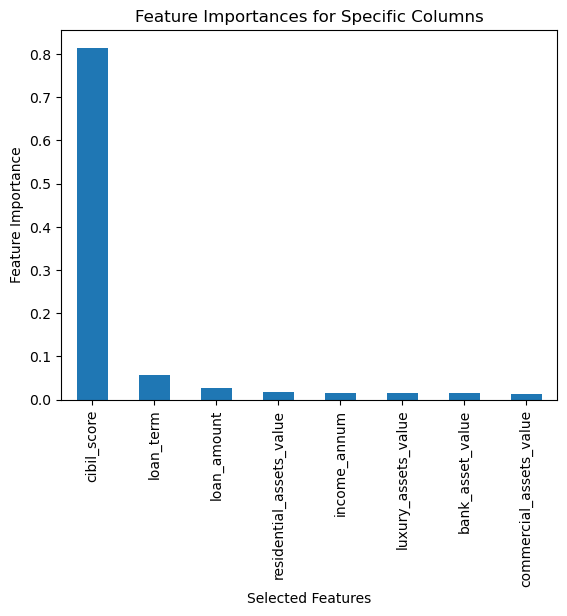

In [94]:
# Check if feature importances are not empty
if len(importances) == 0:
    print("Feature importances are empty.")
else:
    # Get feature importances for the selected columns
    selected_importances = [importances[X.columns.get_loc(col)] for col in selected_columns]

    # Create a Pandas Series for the selected importances
    selected_importances_series = pd.Series(selected_importances, index=selected_columns)

    # Sort the Series by importance in descending order
    selected_importances_sorted = selected_importances_series.sort_values(ascending=False)

    # Create a bar plot to visualize the selected feature importances
    fig, ax = plt.subplots()
    selected_importances_sorted.plot.bar(ax=ax)

    # Add labels, titles, or other customizations as needed
    plt.xlabel('Selected Features')
    plt.ylabel('Feature Importance')
    plt.title('Feature Importances for Specific Columns')

    # Display the plot
    plt.show()